In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('network_ad.csv')

In [12]:
df = df.iloc[:, 2:]

In [13]:
df.sample(5)

,Age,EstimatedSalary,Purchased
257,40,57000,0
122,40,75000,0
388,47,34000,1
180,26,16000,0
40,27,17000,0


In [14]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

x_train.shape, x_train.shape

((280, 2), (280, 2))

In [15]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(x_train)

x_train_scaled = scalar.transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [16]:
scalar.mean_

array([3.78642857e+01, 6.98071429e+04])

In [17]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)

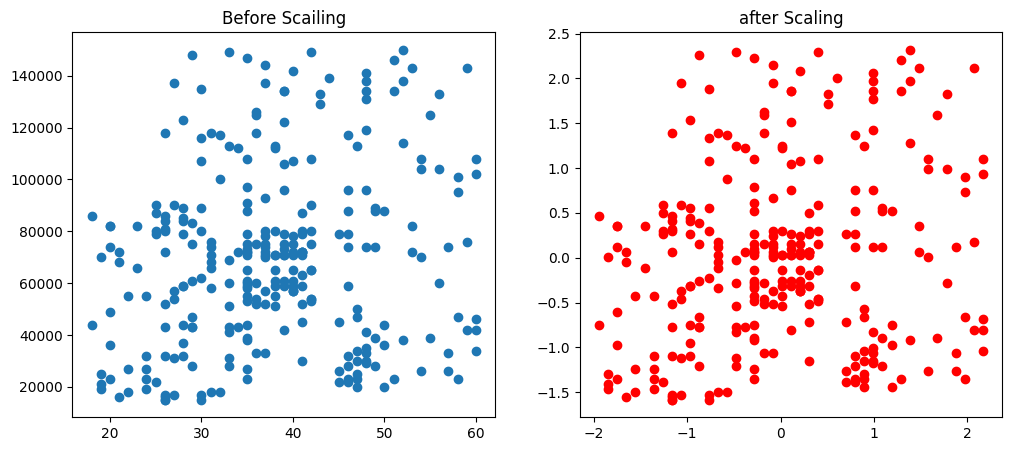

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scailing')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("after Scaling")
plt.show()

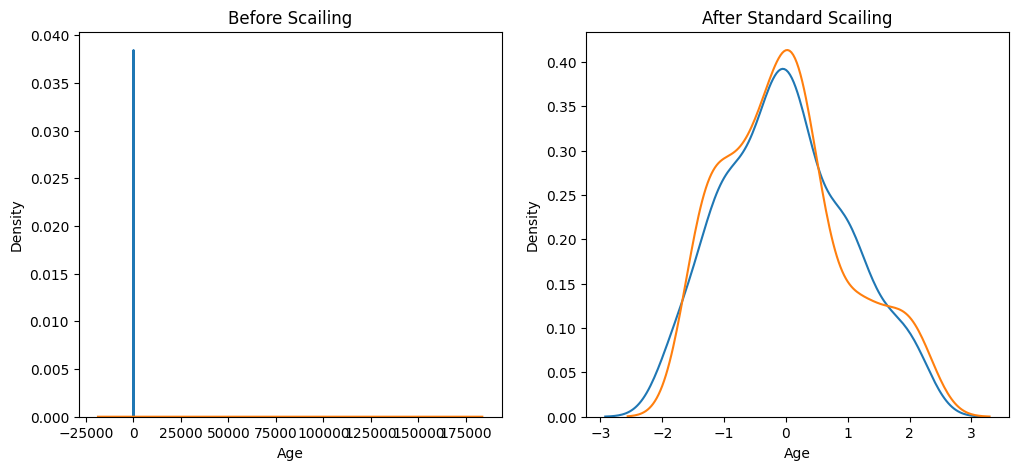

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Scailing')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After Standard Scailing')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

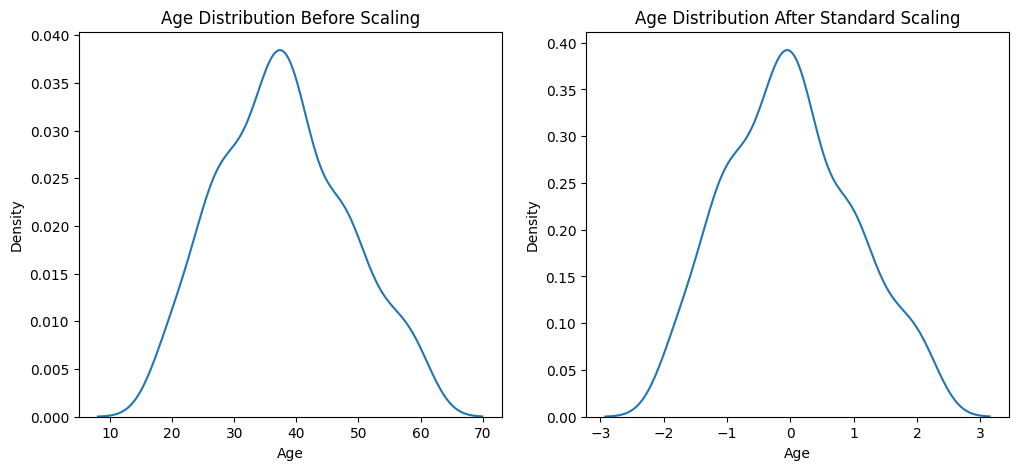

In [21]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

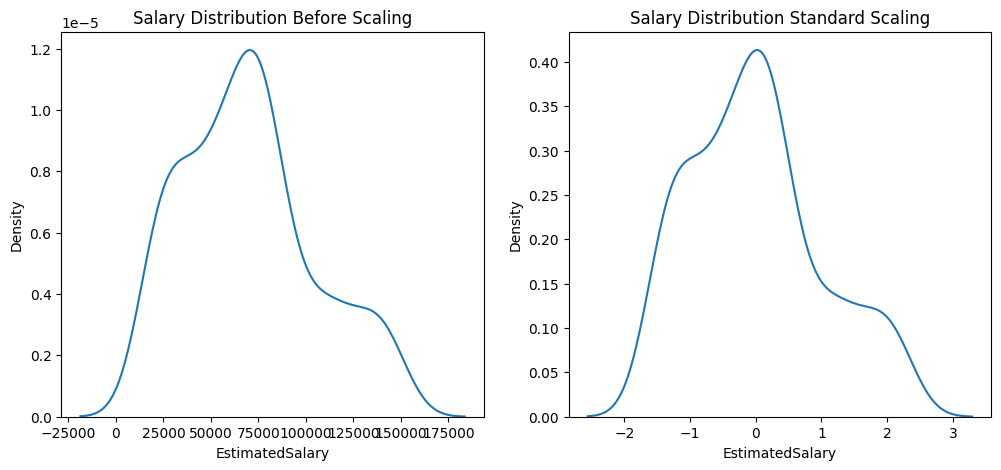

In [23]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [28]:
from sklearn. linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

from sklearn.metrics import accuracy_score

d:\codes\Machine Learning\Tutorials\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [29]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled", accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


d:\codes\Machine Learning\Tutorials\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [32]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000
